In [1]:
import os
import shutil

import rubin_sim.maf.metric_bundles as metric_bundles
import rubin_sim.maf.metrics as metrics
import rubin_sim.maf.slicers as slicers

from rubin_sim.maf.batches.common import standard_summary

import rubin_sim.maf.batches as batches
import rubin_sim.maf.db as db
import rubin_sim.maf.metric_bundles as mb

import healpy as hp
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np

In [5]:
nside = 128
night_lim = 365 #30*3
def f1_batch(run_name, time_min=16):

    standard_stats = standard_summary()
    bundle_list = []
    bands = 'ugrizy'
    
    for band in bands:
        sql = "night < %i and visitExposureTime > %f and band = '%s'" % (night_lim, time_min, band)

        slicer = slicers.HealpixSlicer(nside=nside)
        metric = metrics.CountMetric(col="night")

        bundle_list.append(metric_bundles.MetricBundle(metric, 
                                                       slicer, 
                                                       sql,
                                                       summary_metrics=standard_stats,
                                                       run_name=run_name))

    bd = metric_bundles.make_bundles_dict_from_list(bundle_list)

    return bd

In [6]:
files = ["baseline_v4.3.2_10yrs.db", "g_early_v4.3.2_10yrs.db"] 
run_names = [filename.replace('.db', '') for filename in files]
groups = []
for filename, name in zip(files, run_names):

    bdict = f1_batch(name)
    results_db = db.ResultsDb(out_dir=name + "_ttime")
    group = mb.MetricBundleGroup(
        bdict,
        filename,
        out_dir="temp",
        results_db=results_db,
        save_early=False,
    )
    group.run_all()
    group.plot_all(closefigs=True)
    groups.append(group)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 5505 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 2965 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 2148 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 4027 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 6280 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 5771 bins, returning 200
  warnings.warn(


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 4261 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 2990 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 2130 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 4691 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 5254 bins, returning 200
  warnings.warn(
/Users/yoachim/git_repos/rubin_sim/rubin_sim/maf/utils/maf_utils.py:153: UserWarning: Optimal bin calculation tried to make 5849 bins, returning 200
  warnings.warn(


In [7]:
groups[0].bundle_dict

{'baseline_v4_3_2_10yrs_Count_night_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_u_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x1046da240>,
 'baseline_v4_3_2_10yrs_Count_night_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_g_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x1046d9df0>,
 'baseline_v4_3_2_10yrs_Count_night_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_r_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x31247a540>,
 'baseline_v4_3_2_10yrs_Count_night_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_i_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x31247bc20>,
 'baseline_v4_3_2_10yrs_Count_night_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_z_HEAL': <rubin_sim.maf.metric_bundles.metric_bundle.MetricBundle at 0x31247b4d0>,
 'baseline_v4_3_2_10yrs_Count_night_night_lt_365_and_visitExposureTime_gt_16_000000_and_band_y_HEAL': <rubin_sim.maf.met

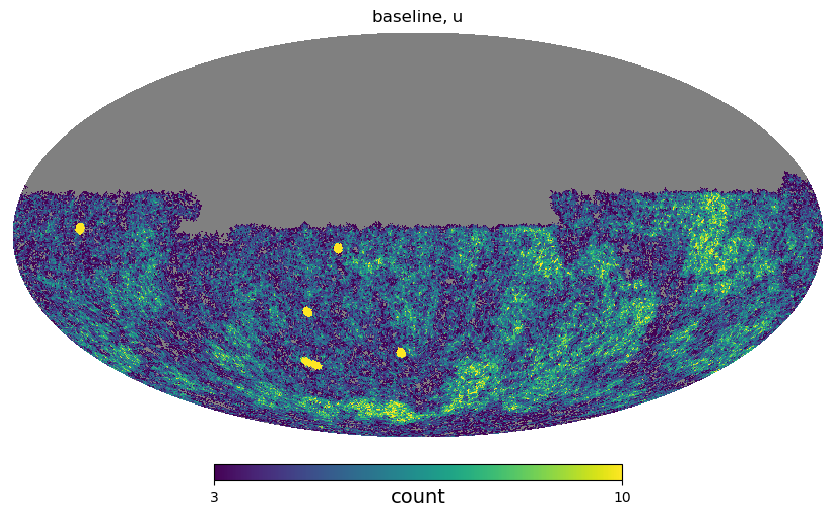

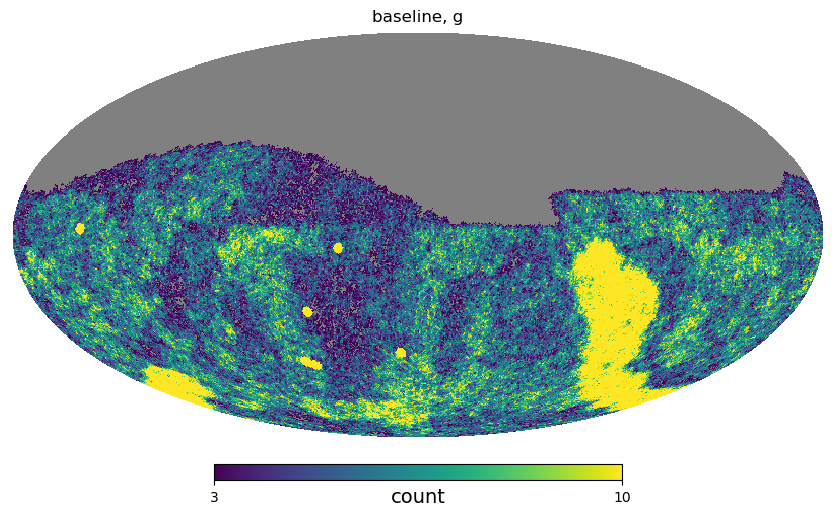

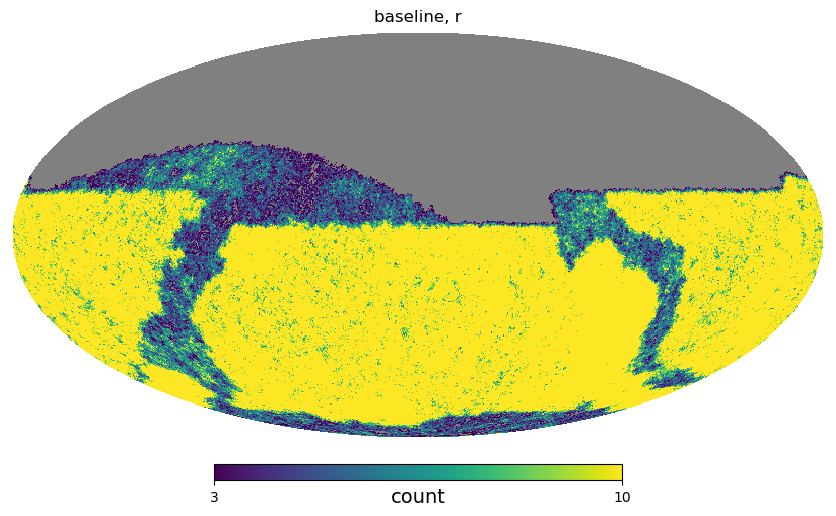

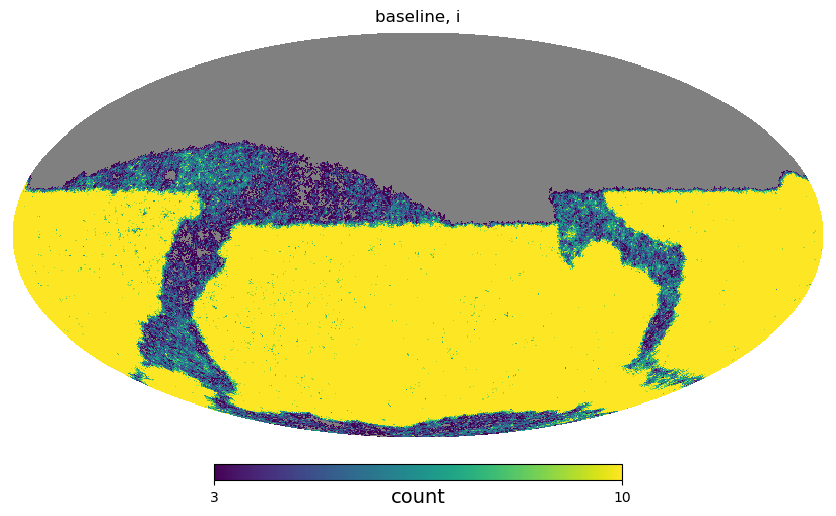

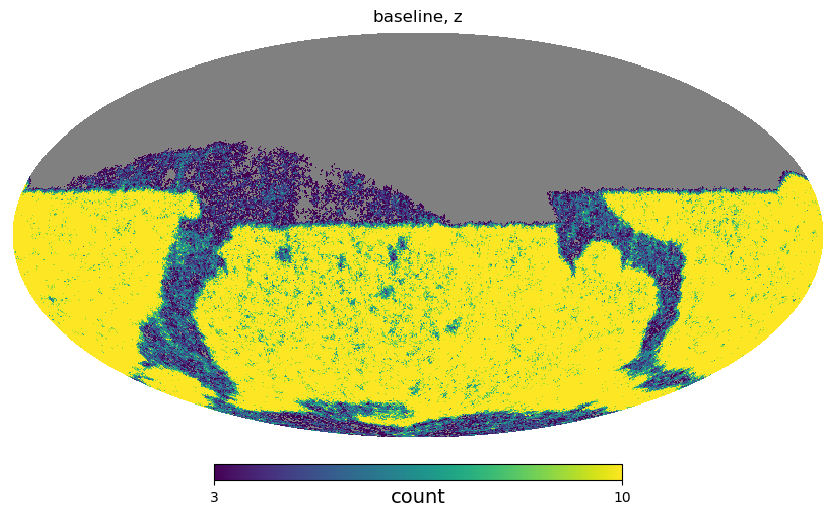

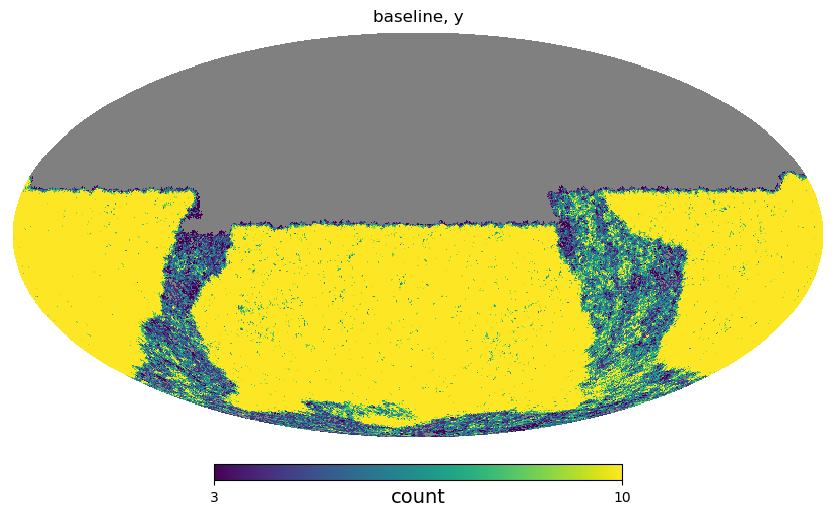

In [12]:
for key,band in zip(groups[0].bundle_dict, 'ugrizy'):
    vals = groups[0].bundle_dict[key].metric_values
    mask = np.where(vals < 3)
    vals[mask] = np.nan
    hp.mollview(vals, unit="count", title="baseline, %s" % band, max=10)

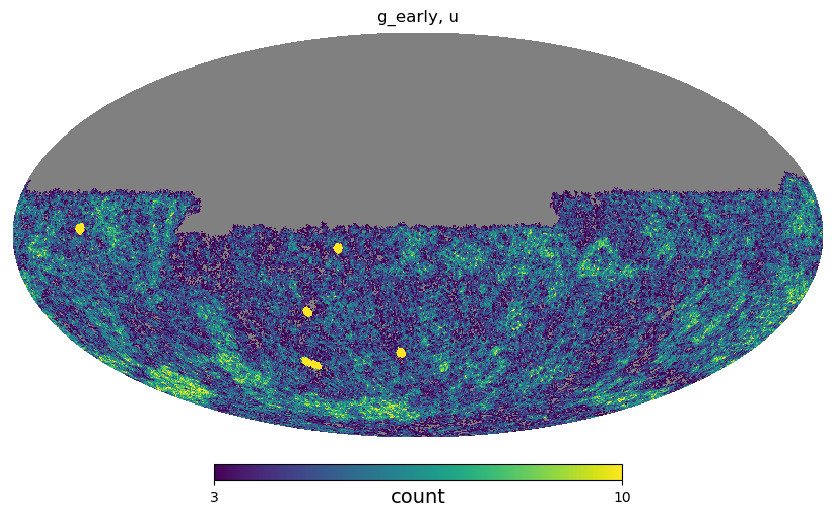

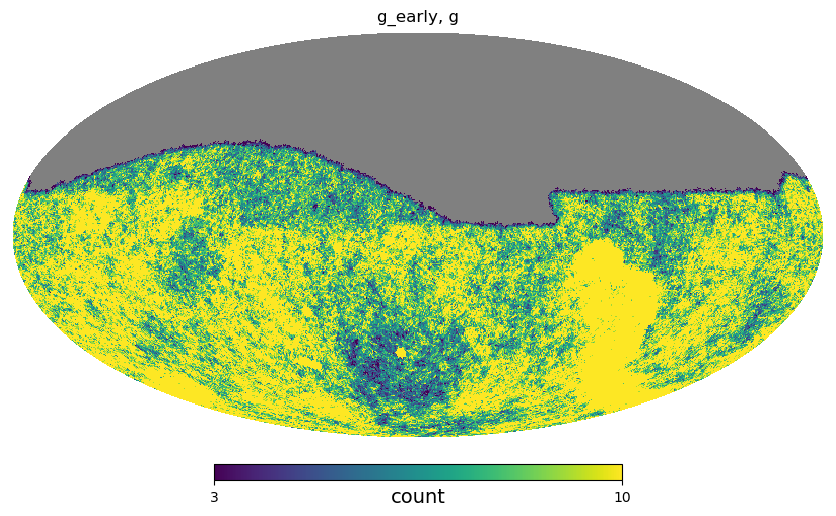

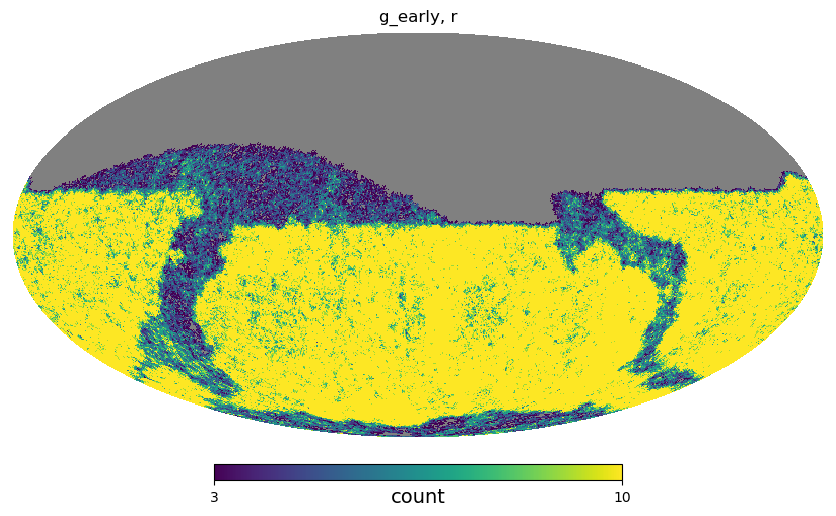

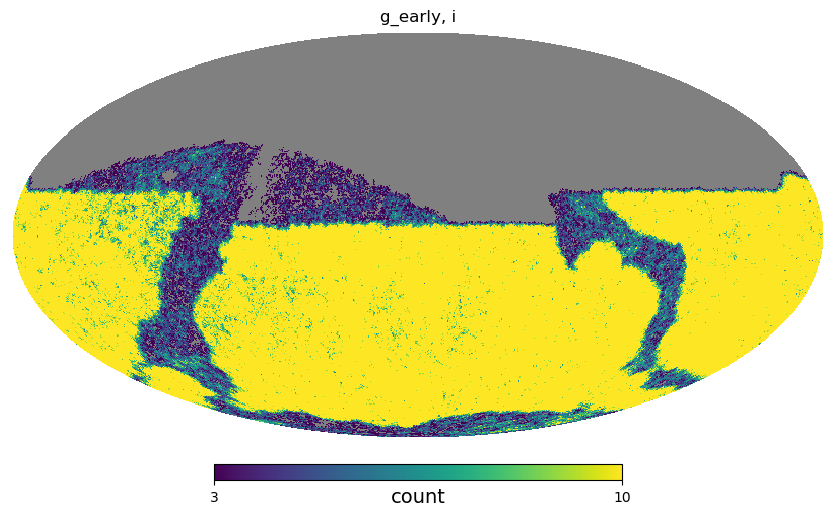

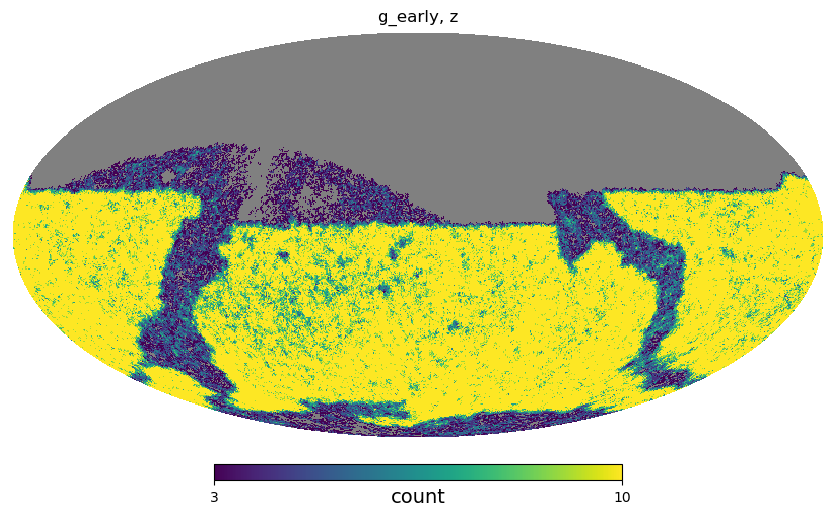

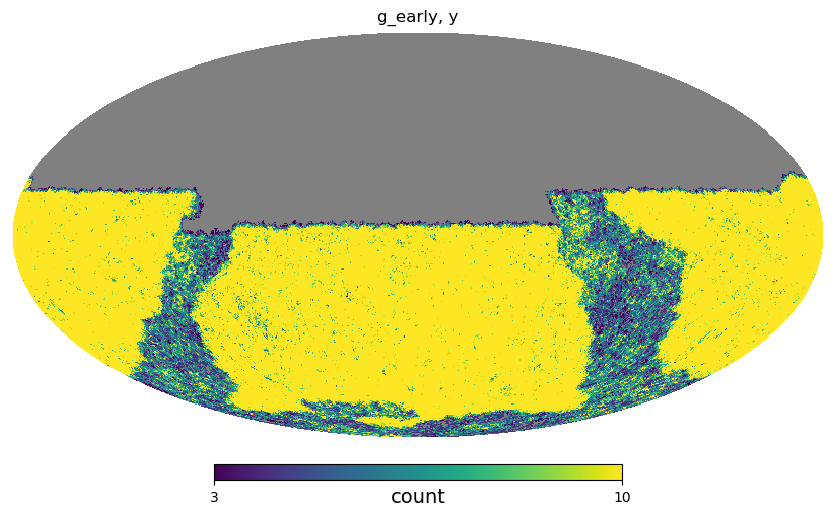

In [13]:
for key,band in zip(groups[1].bundle_dict, 'ugrizy'):
    vals = groups[1].bundle_dict[key].metric_values
    mask = np.where(vals < 3)
    vals[mask] = np.nan
    hp.mollview(vals, unit="count", title="g_early, %s" % band, max=10)